<div align='center'><a href='https://www.facebook.com/fea.dev/'/ style='display:inline-block'>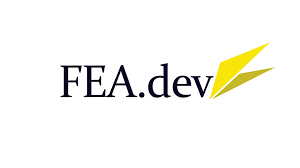<a/><div/>

# <font color=blue|blue|red>**Jupyter Notebook**</font> 
### 1) O que é o Jupyter Notebook?
O Jupyter Notebook é um documento que permite você executar códigos em Python e escrever textos como um word, tudo em um mesmo lugar.

### 2) Como eu faço para rodar o código?
Para rodar uma célula basta clicar na célula e precionar **Shift + Enter**. Você também pode rodar uma célula ou mais de uma pelo menu de opções na aba "Cell". A células são os retângulos, que podem conter um código em Python ou um texto escrito.

Caso você clique nos textos e a formatação dele fique estranha basta rodar essa célula para corrigir.


### 3) Porquê eu posso obter diferentes resultados toda vez que eu rodo a mesma célula?
Quando você roda uma célula isso atualiza alguma variável (ex, x = x+1), assim você terá resultados diferentes para x enquanto você rodar várias vezes essa célula.

### 4) Estou travado em algum exercício, o que eu faço?
Nós recomendamos que você busca alguem do FEA.dev ou busque informações no Google ou no Stack Overflow. 

### 5) Como eu salvo o meu progresso?
Clique em "File" na barra de opções e por fim clique na opção "Save and Checkpoit"

### 6) O que devo fazer se o meu Jupyter travar?
Caso isso acontece você pode tentar reiniciar o Kernel clicando em "Kernel" na barra de opções, e por fim selecionando a opção "Restart"

### 7) Ainda estou com dúvidas sobre o Jupyter.
Caso isso ocorra pode nos chamar ou se preferir pode assistir o seguinte vídeo: https://www.youtube.com/watch?v=dPb4acFiaYs

# <font color = blue|blue|red >**Aula 04: Vizualização de Dados com Python**</font> 
## <font color=blue|blue|red>O que esperar do Curso?</font>

Bem vindo(a) ao Curso de Finanças Quantitativas em Python do FEA.dev. <ins>**_O obejtivo desse curso é ensinar à você como construir e gerir uma carteira de investimento de forma sistematizada_**</ins>. Para isso vamos abordar temas como criação e gestão de portfólio; extração de dados; visualização de dados; análise de risco, entre outros, tudo isso utilizando Python.


### <font color=green|black>**Tópicos da Aula:** </font>
- Básico da Criação de Gráficos
- Opções para Personalização do Gráfico
- Tipos de Gráficos existentes
- Gráfico de Velas

### <font color=green|black>**Materiais de Estudo Extras e Complementares à Aula:** </font>
Está aula do curso é focada na criação de gráficos por meio da própria biblioteca Pandas, e <ins>**_a ideia é ensinar o básico de criação de gráficos e focar naqueles que serão mais relevantes para o curso._**</ins> Por isso não vamos abordar todos os tipos de gráficos e opções para a criação deles, dessa forma caso queira se aprofundar nesse conteúdo vamos deixar alguns materias abaixo:

> Guia de Visualização do Pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

> Guia Básico do Pandas: https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html#min-tut-04-plotting

> Guia Matplotlib, por David Gladson: https://medium.com/@davidgladson5

> Gráfico de Velas (Plotly): https://plotly.com/python/candlestick-charts/

> Como baixar Plotly: https://plotly.com/python/getting-started/

### <font color=green|black>**Tenho Dúvidas!** </font>
Caso tenha qualquer dúvida <ins>**_sinta-se livre para chamar qualquer um dos nossos membros pelo nosso Instagram ou email_**</ins>. Além disso, outra ótima ferramenta para se tirar dúvidas e fazer pesquisas é o Stack Overflow. Lembrando que se possível, quando for pesquisar no Google, é recomendado que a faço em inglês, devido a maior disponibilidade de informações.
> Email: duvidas.feadev@gmail.com

> Instagram: https://www.instagram.com/fea.dev/

# <font color = blue|blue|red >**Visualização de dados**</font> 

## <font color = blue|blue|red > Antes de Programar ...</font> 
Para realizarmos <ins>**_a viluzação de dados e a criação de gráficos por meio do Python vamos utilizar biblioteca Pandas_**</ins>, que usa a outra biblioteca como base, Matplotlib, para criar esses gráficos.

<ins>**_O grande diferencial de usar o Python para a criação de gráficos é a imenssa gama de opções que o criador tem_**</ins>, muito superior do que o Excel, por exemplo.

&nbsp;

<img src = "https://miro.medium.com/max/4725/1*OAFEIg9w1XHyZk0xBud14A.png" style = "width:100%" />



 

## <font color = green|black >**Bora programar !**</font>
<img src = "https://media4.giphy.com/media/LmNwrBhejkK9EFP504/giphy.gif" style = "height:200px; width:200px" />

## <font color = green|black >**Bibliotecas:**</font>

In [6]:
import pandas as pd
from pandas_datareader import data as web
from datetime import datetime
from time import sleep
import plotly.graph_objects as go

# <font color = blue|blue|red >**Extraindo Precos Ações**</font> 

<img src = "https://transplantpatientstrust.org.uk/wp-content/uploads/cloud-computing-1990406_960_720-1.png" style = " width:30%" />

In [2]:
# funcao para extratir os precos de fechamento
def extrai_precos(tickers: list, ini, fim):
    """
    List -> DataFrame de precos
    """
    # lista com DataFrames
    dfs = []
    
    # Loop Extracao
    for ticker in tickers:
        try:
            # Extrai
            df_preco = web.DataReader(ticker, 'av-daily-adjusted',start=ini, end=fim, api_key=('KY0T276ID4ZGW110'))
            # Seleciona apenas o precode de fechamento
            df_preco = pd.DataFrame({ticker:df_preco['adjusted close']})
            # muda o index para datetime
            df_preco.index = pd.to_datetime(df_preco.index, format='%Y-%m-%d').to_period('D')
            # add a lista
            dfs.append(df_preco)

            if tickers.index(ticker) % 5 == 0:
                sleep(61)
        except:
            print('Ticker falho: ', ticker)
    
    # Junta dfs
    return pd.concat(dfs, axis = 1)

In [3]:
acoes = ["MGLU3.SAO", 'ITUB4.SAO', 'BTOW3.SAO']
dt_ini = datetime(2017,12,27)
dt_fim = datetime(2019,12,31)
df_precos = extrai_precos(acoes, dt_ini, dt_fim)

In [4]:
df_precos.head()

,MGLU3.SAO,ITUB4.SAO,BTOW3.SAO
2017-12-27,2.2626,27.3009,20.2328
2017-12-28,2.3481,27.3717,20.2625
2018-01-02,2.3213,28.2169,19.7683
2018-01-03,2.2921,28.4096,19.6101
2018-01-04,2.3468,29.0016,20.1439


In [5]:
rets = df_precos.pct_change().iloc[1:]
rets.head()

,MGLU3.SAO,ITUB4.SAO,BTOW3.SAO
2017-12-28,0.037788,0.002593,0.001468
2018-01-02,-0.011413,0.030879,-0.024390
2018-01-03,-0.012579,0.006829,-0.008003
2018-01-04,0.023865,0.020838,0.027221
2018-01-05,-0.019601,0.002876,-0.018646


# <font color = blue|blue|red >**Básico da Criação de Gráficos**</font> 
Para criarmos gráficos no pandas nós vamos sempore usar o método **_.plot()_**, esse método pode ser usando tanto em DataFrame quanto em Series. E tudo que fizermos a partir de agpra vai se derivar desse método.

O simples uso do **_.plot()_** por padrão cria um <ins>**_gráfico de linha para cada coluna do DataFrame._**</ins>, onde o <ins>**_eixo x vai ser os valores e eixo y o index_**</ins> o DataFrame ou Series, e a legenda será o nome da(s) coluna(s).

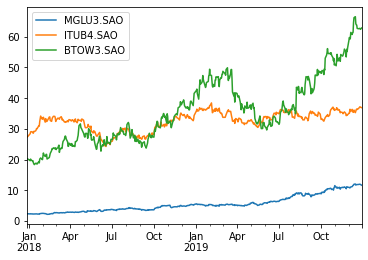

In [6]:
# Plotar o Precos
axs = df_precos.plot()

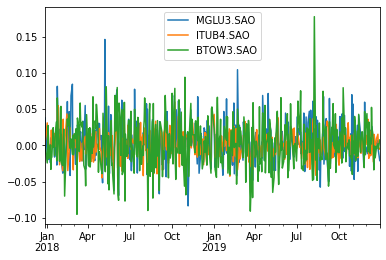

In [7]:
# Plotar o retornos diarios
rets.plot()

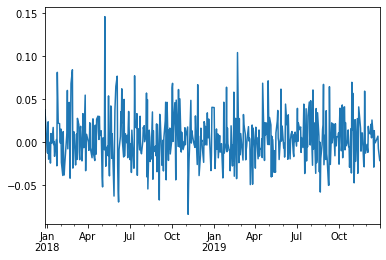

In [8]:
ax = rets['MGLU3.SAO'].plot()

# <font color = blue|blue|red >**Tipos de Dados de um Gráfico**</font>
Quando estamos trabalhando com gráficos no Python vão existir dois tipos de dados: as figuras, e os axes.
> <ins>**_Figura: é a camada superior de toda a imagem que vemos_**</ins> (como se fosse um album de fotos)

As figuras vão ser compostas por um gráfico ou mais, legendas, títulos, entros elementos. As figuras são o todo da imagem.

> <ins>**_Axes: é uma parte da Figura_**</ins> (como se fosse uma foto dentro de um album)

Os axes são os gráficos em sí. Nós somo capazes de delimitar em qual pedaço da fidura o axe estará, impondo limites para o eixo x e y de cada espaço ocupado pleo gráficos.


<img src = "https://miro.medium.com/max/700/1*ExOEYU51pmM-RFtrbmiRzg.png" style = " width:60%" />

## <font color = green|black >**O que o .plot() Retorna?**</font>
O método .plot() vai retornar apenas um axes e não uma figura. Essa informaçõe é extratamente importante caso você queira salvar esse gráfico em formato png, ou queira juntar vários gráficos em uma só figura. E por questões de tempo e relevância não vamos abordar esses tópicos na aula, mas vocês vão encontrar essas ingformações nos materias extras. 

# <font color = blue|blue|red >**Personalização dos Gráficos**</font>
Para podermos personalizar os gráficos basta nos alterarmos os parâmetros do método .plot(). Exitem inúmeras possibilidades, dentre elas, mudar a cor, tinha da linha, tamanho do gráfico, eixo x, eixo y, dentre outras. 

E uma maneira muito fácil de visualizar todo os parâmtros que podemos alterar é simplesmente cliar em cima do método **.plot()** e <ins>**_apertar (SHIFT + TAB), dessa forma o jupyter abrirá o docstring da função._**</ins>

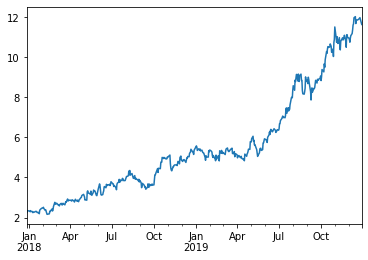

In [9]:
# SHIFT + TAB
df_precos['MGLU3.SAO'].plot()

## <font color = green|black >**Tamanho:**</font>
Para alterarmos o tamanho do gráfico usamos o parâmetro **_figsize_**, e passamos uma tupla com as dimensões de largura e altura

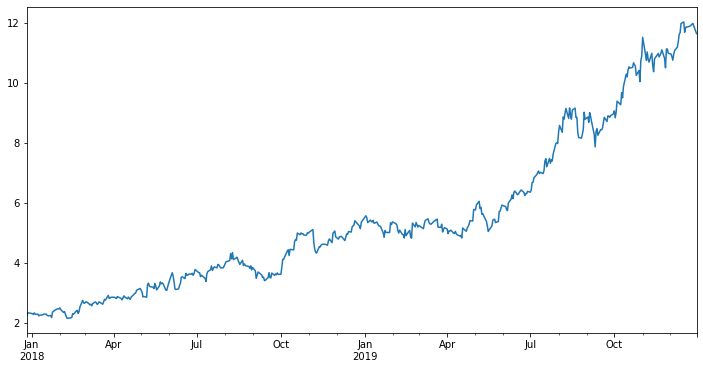

In [10]:
# Figsize
dimensao = (12,6) # (largura, altura)
df_precos['MGLU3.SAO'].plot(figsize=dimensao)

## <font color = green|black >**Título:**</font>
Para criarmos um título para o gráfico usamos o parâmetro **_title_**, e passamos uma string, como o nome do título.

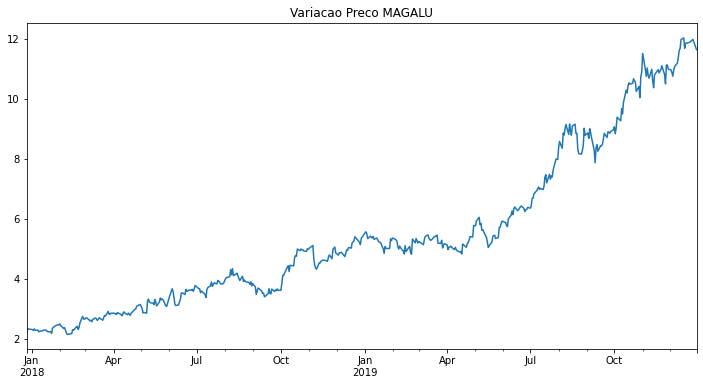

In [11]:
title = 'Variacao Preco MAGALU'
df_precos['MGLU3.SAO'].plot(figsize=dimensao, title=title)

## <font color = green|black >**Habilitando e Desabilitando a Legenda:**</font>
Para desativarmos as legendas de um gráfico basta alterarmos o parâmetro **_legend_**, e passarmos uma boolean (True/False). No caso das Series as legandas estão desativadas automaticamente.

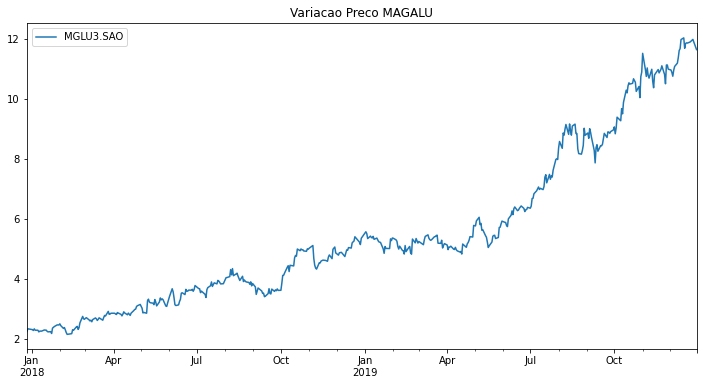

In [12]:
# Series
df_precos['MGLU3.SAO'].plot(figsize=dimensao, title=title, legend=True)

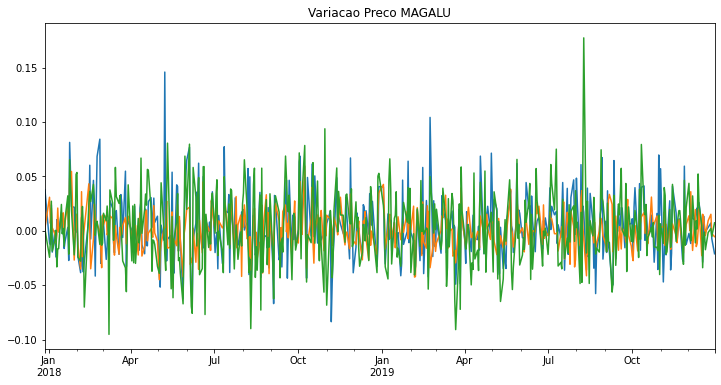

In [13]:
# DataFrame
rets.plot(figsize=dimensao, title=title, legend=False)

## <font color = green|black >**Alterando a Legenda:**</font>
Não existe um parâmetro que altere o texto da legenda. Por isso nós vamos usar um método do Axes, chamado **_.legend_**, e para isso precisamos pasar uma lista de com as novas legendas. 

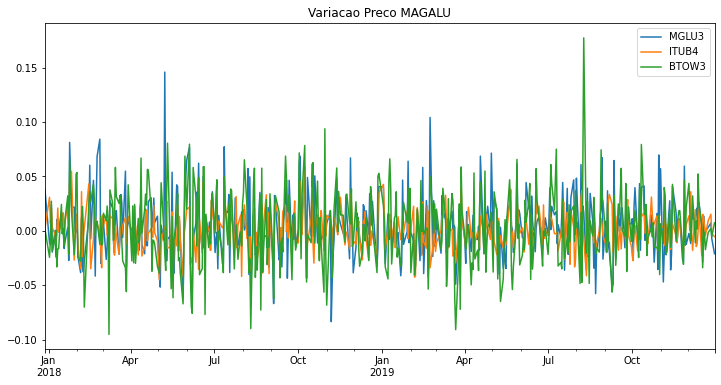

In [14]:
# Nova legenda
legenda = ['MGLU3', 'ITUB4','BTOW3']
ax = rets.plot(figsize=dimensao, title=title, legend=True)
ax.legend(legenda)

## <font color = green|black >**Alterar Cor:**</font>
Para alterarmos as cores de um gráfico basta alterarmos o parâmetro **_color_**, e passarmos uma string, que representa uma determinada cor. No caso de um DataFrame se quisermos alterar a cor de linha precisamos passar uma lista com o nome das cores

<img src = "https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_001.png" style = " width:60%" />

<img src = "https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_002.png" style = " width:60%" />

<img src = "https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_003.png" style = " width:60%" />

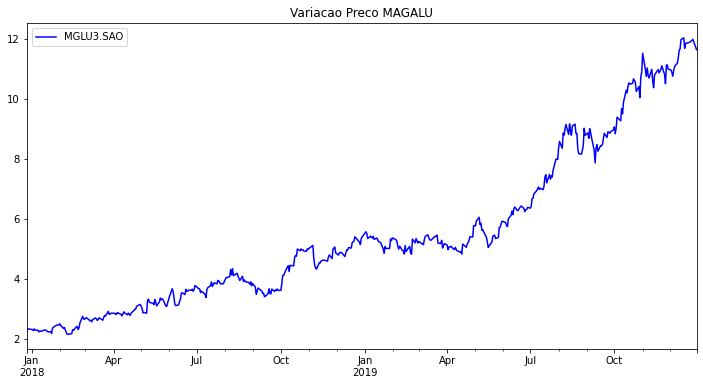

In [15]:
# Series
df_precos['MGLU3.SAO'].plot(figsize=dimensao, title=title, legend=True, color='b')

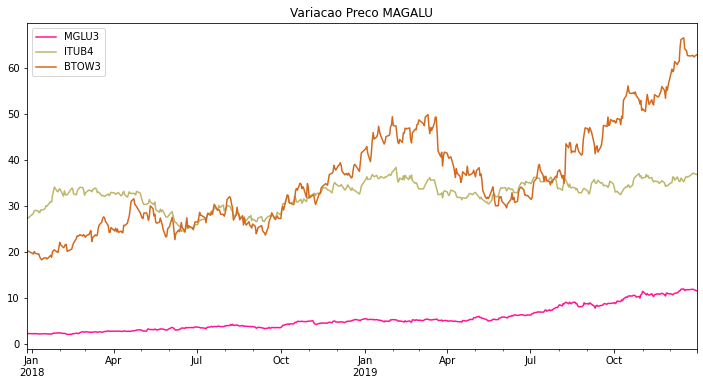

In [16]:
# DataFrame
cores = ['deeppink', 'darkkhaki', 'chocolate']
ax = df_precos.plot(figsize=dimensao, title=title, legend=True, color=cores)
ax.legend(legenda)

## <font color = green|black >**Linhas:**</font>
Quando criamos um gráfico de linhas podemos alterar o estilo dessas linhas por meio do parâmetro **_style_**. Para isso passarmos uma string, que representa um determinado estilo. No caso de um DataFrame se quisermos alterar o estilo de linha precisamos passar uma lista com o nome dos estilos.

<img src = "https://matplotlib.org/_images/sphx_glr_line_styles_reference_001.png" style = " width:40%" />


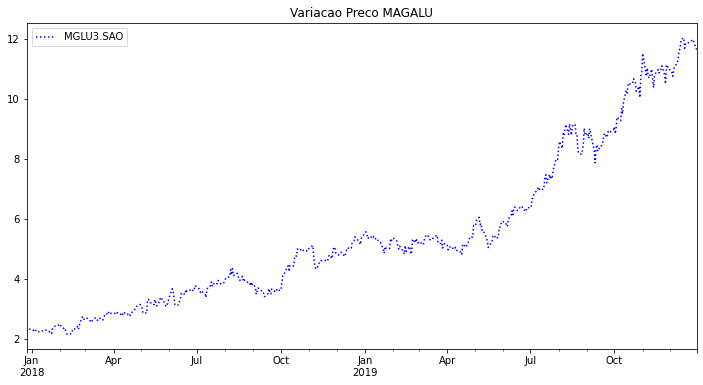

In [17]:
# Series
df_precos['MGLU3.SAO'].plot(figsize=dimensao, title=title, legend=True, color='b', style=':')

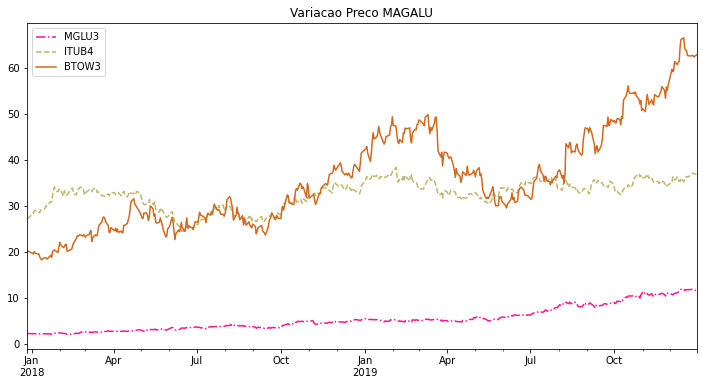

In [18]:
# DataFrame
estilos = ['-.', '--', '-']
ax = df_precos.plot(figsize=dimensao, title=title, legend=True, color=cores, style=estilos)
ax.legend(legenda)

# <font color = blue|blue|red >**Tipos de Gráficos**</font>
Além do gráfico de linha existem uma série de outros tipos de gráficos que podemos criar, e basta usarmos alterarmos um parâmetro do .plot(), chamdo de **_kind_**.

- ‘bar’ ou ‘barh’ gráficos de barra

- ‘hist’ para histogramas

- ‘box’ para boxplot

- ‘kde’ ou ‘density’ para gráficos de desidade

- ‘area’ para gráficos de área

- ‘scatter’ para gráficos de ponto

- ‘hexbin’ para gráficos bin hexagonal

- ‘pie’ para gráficos de pizza

## <font color = green|black >**Pontos:**</font>
Precisamos especificar o eixo X e Y. Nesse caso existe um parâmetro muito legal que o alpha, que diz o quão transparente é o ponto, usando ele nós somos capazes de exergar a aglomeração dos pontos.

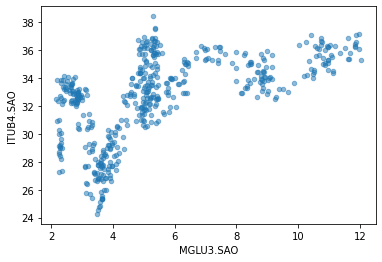

In [19]:
df_precos.plot(kind='scatter', x="MGLU3.SAO", y='ITUB4.SAO', alpha=0.5)

## <font color = green|black >**Histograma:**</font>

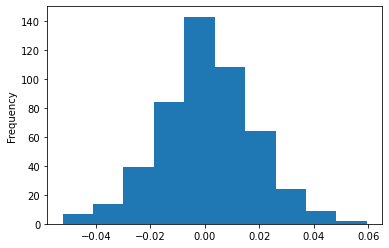

In [20]:
rets['ITUB4.SAO'].plot(kind='hist')

# <font color = blue|blue|red >**Gráfico de Velas ou Candlestick**</font>
O Candlestick é uma uma representação gráfico dos preços das ações, e nele podemos observar informações sobre as ações como: preço de abertura e fechamento, preço de compra e venda mínimo; preço de compra e venda máximo; e se o preço subiu o caiu.

<img src = "https://www.bussoladoinvestidor.com.br/wp-content/uploads/2019/12/upload_cms_candlestick_Candlestick1.png" style = " width:40%" />

## <font color = green|black >**Plotly:**</font>
Para criar os nossos gráficos de velas, vamos usar a biblioteca Plotly, conforme a seguir. Pra isso precisamos criar uma lista com as informações necessárias. 
## <font color = green|black >**Preparando o Plotly no Jupyter Lab:**</font>
Para podermos usar o Pyplot no jupyter lab, precisamos instalar primeiramente o JupyterLab e os pacotes do ipywidgets usando o pip...
No caso do Jupyter Notebook não é necessário nem as extensões nem o NodeJs.

> pip install jupyterlab "ipywidgets>=7.5"

ou no Anaconda...

> conda install jupyterlab "ipywidgets=7.5"

Segundo precisamos instalar o NodeJs no nosso computador pelo link abaixo:

>https://nodejs.org/pt-br/

Por fim vamos instalar uma extensão do JupyterLab, por meio de um código no cmd:
> jupyter labextension install jupyterlab-plotly@4.13.0

## <font color = green|black >**Usando Plotly:**</font>

In [3]:
dt_ini = datetime(2017,12,27)
dt_fim = datetime(2019,12,31)
mglu_daily = web.DataReader("MGLU3.SAO", "av-daily-adjusted",start=dt_ini, end=dt_fim, api_key=('ALPHA_VANTAGE_KEY'))
mglu_daily.index = pd.to_datetime(mglu_daily.index, format='%Y-%m-%d') 
mglu_daily.head()

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient
2017-12-27,76.45,78.00,76.45,77.30,2.2626,1285000,0.0,1.0
2017-12-28,78.70,80.22,77.81,80.22,2.3481,2872700,0.0,1.0
2018-01-02,80.90,82.38,78.41,79.30,2.3213,1857100,0.0,1.0
2018-01-03,79.00,81.36,77.52,78.30,2.2921,1293300,0.0,1.0
2018-01-04,80.00,80.52,79.30,80.18,2.3468,1498000,0.0,1.0


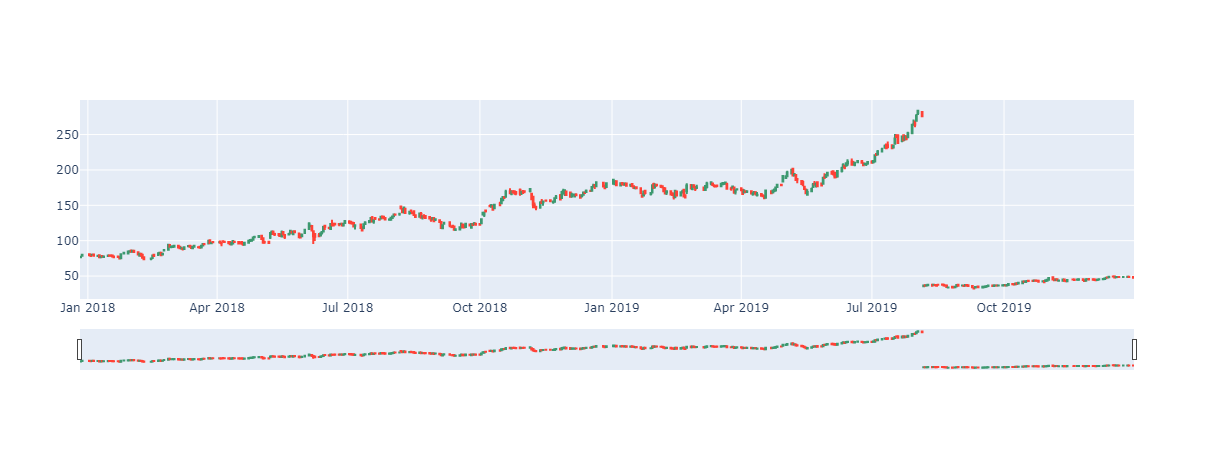

In [7]:
# informacoes 
info = [go.Candlestick(
    x=mglu_daily.index,            
    open=mglu_daily['open'],
    high=mglu_daily['high'],
    low=mglu_daily['low'],
    close=mglu_daily['close'])
]
fig = go.Figure(data=info)

fig.show()